In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from math import sqrt

knn = KNeighborsClassifier(n_neighbors=1)
pd.options.mode.chained_assignment = None  # default='warn'

In [24]:
import os
os.getcwd()

'C:\\Users\\User\\Desktop\\Setup'

In [25]:
visit_data = pd.read_csv("./output/visits_noise.csv");
print(visit_data.shape)
visit_data.head()

(300, 17)


,name,languages,colorDepth,deviceMemory,screenResolution,hardwareConcurrency,timezoneOffset,sessionStorage,localStorage,indexedDB,openDatabase,platform,touchSupport,fonts,pluginsSupport,chrome,cookiesEnabled
0,Anatolii,ru,24,1,"[1280,800]",12,240,True,True,True,False,Linux,False,"[""Georgia""]",False,True,True
1,Anatolii,ru,24,1,"[1280,800]",12,240,True,True,True,False,Linux,False,"[""Georgia""]",False,True,True
2,Hilbert,ru,12,64,"[1920,1440]",16,180,True,False,False,False,Win32,True,"[""Georgia""]",False,False,False
3,Anatolii,ru,24,1,"[1280,800]",12,240,True,True,True,False,Linux,False,"[""Georgia""]",False,True,True
4,Hilbert,ru,12,64,"[1920,1440]",16,180,True,False,False,False,Win32,True,"[""Georgia""]",False,False,False


In [5]:
visit_data.groupby(['name']).count().head()

,languages,colorDepth,deviceMemory,screenResolution,hardwareConcurrency,timezoneOffset,sessionStorage,localStorage,indexedDB,openDatabase,platform,touchSupport,fonts,pluginsSupport,chrome,cookiesEnabled
name,,,,,,,,,,,,,,,,
Albrecht,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Aleksey,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Alexandr,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Anatolii,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Andrei,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [6]:
headers = ['sessionStorage', 'localStorage', 'indexedDB', 'openDatabase', 'touchSupport', 'pluginsSupport', 'chrome', 'cookiesEnabled']
visit_data[headers] = visit_data[headers].astype(int)

In [7]:
for index, i in enumerate(visit_data['screenResolution']):
    clear = i.replace('[' , '').replace(']' , '').split(',')
    size = int(clear[0])*int(clear[1])
    visit_data['screenResolution'][index] = size/1000000

In [8]:
visit_data.head()

,name,languages,colorDepth,deviceMemory,screenResolution,hardwareConcurrency,timezoneOffset,sessionStorage,localStorage,indexedDB,openDatabase,platform,touchSupport,fonts,pluginsSupport,chrome,cookiesEnabled
0,Anatolii,ru,24,1,1.024,12,240,1,1,1,0,Linux,0,"[""Georgia""]",0,1,1
1,Anatolii,ru,24,1,1.024,12,240,1,1,1,0,Linux,0,"[""Georgia""]",0,1,1
2,Hilbert,ru,12,64,2.7648,16,180,1,0,0,0,Win32,1,"[""Georgia""]",0,0,0
3,Anatolii,ru,24,1,1.024,12,240,1,1,1,0,Linux,0,"[""Georgia""]",0,1,1
4,Hilbert,ru,12,64,2.7648,16,180,1,0,0,0,Win32,1,"[""Georgia""]",0,0,0


In [9]:
for index, i in enumerate(visit_data['timezoneOffset']):
    size = i/60
    visit_data['timezoneOffset'][index] = size

In [10]:
visit_data.head()

,name,languages,colorDepth,deviceMemory,screenResolution,hardwareConcurrency,timezoneOffset,sessionStorage,localStorage,indexedDB,openDatabase,platform,touchSupport,fonts,pluginsSupport,chrome,cookiesEnabled
0,Anatolii,ru,24,1,1.024,12,4,1,1,1,0,Linux,0,"[""Georgia""]",0,1,1
1,Anatolii,ru,24,1,1.024,12,4,1,1,1,0,Linux,0,"[""Georgia""]",0,1,1
2,Hilbert,ru,12,64,2.7648,16,3,1,0,0,0,Win32,1,"[""Georgia""]",0,0,0
3,Anatolii,ru,24,1,1.024,12,4,1,1,1,0,Linux,0,"[""Georgia""]",0,1,1
4,Hilbert,ru,12,64,2.7648,16,3,1,0,0,0,Win32,1,"[""Georgia""]",0,0,0


In [11]:
for index, i in enumerate(visit_data['languages']):
    if i == 'en':
        size = 0
    elif i == 'ru':
        size = 1
    visit_data['languages'][index] = size

In [12]:
visit_data.head()

,name,languages,colorDepth,deviceMemory,screenResolution,hardwareConcurrency,timezoneOffset,sessionStorage,localStorage,indexedDB,openDatabase,platform,touchSupport,fonts,pluginsSupport,chrome,cookiesEnabled
0,Anatolii,1,24,1,1.024,12,4,1,1,1,0,Linux,0,"[""Georgia""]",0,1,1
1,Anatolii,1,24,1,1.024,12,4,1,1,1,0,Linux,0,"[""Georgia""]",0,1,1
2,Hilbert,1,12,64,2.7648,16,3,1,0,0,0,Win32,1,"[""Georgia""]",0,0,0
3,Anatolii,1,24,1,1.024,12,4,1,1,1,0,Linux,0,"[""Georgia""]",0,1,1
4,Hilbert,1,12,64,2.7648,16,3,1,0,0,0,Win32,1,"[""Georgia""]",0,0,0


In [13]:
for index, i in enumerate(visit_data['platform']):
    if i == 'Linux':
        size = 0
    elif i == 'Win32':
        size = 1
    elif i == 'Win64':
        size = 2
    elif i == 'Mac':
        size = 3
    visit_data['platform'][index] = size

In [14]:
visit_data.head()

,name,languages,colorDepth,deviceMemory,screenResolution,hardwareConcurrency,timezoneOffset,sessionStorage,localStorage,indexedDB,openDatabase,platform,touchSupport,fonts,pluginsSupport,chrome,cookiesEnabled
0,Anatolii,1,24,1,1.024,12,4,1,1,1,0,0,0,"[""Georgia""]",0,1,1
1,Anatolii,1,24,1,1.024,12,4,1,1,1,0,0,0,"[""Georgia""]",0,1,1
2,Hilbert,1,12,64,2.7648,16,3,1,0,0,0,1,1,"[""Georgia""]",0,0,0
3,Anatolii,1,24,1,1.024,12,4,1,1,1,0,0,0,"[""Georgia""]",0,1,1
4,Hilbert,1,12,64,2.7648,16,3,1,0,0,0,1,1,"[""Georgia""]",0,0,0


In [15]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
visit_data["fonts"] = ord_enc.fit_transform(visit_data[["fonts"]])
     

In [16]:
visit_data.head()

,name,languages,colorDepth,deviceMemory,screenResolution,hardwareConcurrency,timezoneOffset,sessionStorage,localStorage,indexedDB,openDatabase,platform,touchSupport,fonts,pluginsSupport,chrome,cookiesEnabled
0,Anatolii,1,24,1,1.024,12,4,1,1,1,0,0,0,5.0,0,1,1
1,Anatolii,1,24,1,1.024,12,4,1,1,1,0,0,0,5.0,0,1,1
2,Hilbert,1,12,64,2.7648,16,3,1,0,0,0,1,1,5.0,0,0,0
3,Anatolii,1,24,1,1.024,12,4,1,1,1,0,0,0,5.0,0,1,1
4,Hilbert,1,12,64,2.7648,16,3,1,0,0,0,1,1,5.0,0,0,0


In [17]:
data = ['languages', 'colorDepth', 'deviceMemory', 'screenResolution', 'hardwareConcurrency', 'timezoneOffset', 'sessionStorage', 'localStorage', 'indexedDB', 'openDatabase', 'platform', 'touchSupport', 'fonts', 'pluginsSupport', 'chrome', 'cookiesEnabled'  ]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(visit_data[data], visit_data['name'], random_state = 0)

In [18]:
X_train.head()

,languages,colorDepth,deviceMemory,screenResolution,hardwareConcurrency,timezoneOffset,sessionStorage,localStorage,indexedDB,openDatabase,platform,touchSupport,fonts,pluginsSupport,chrome,cookiesEnabled
259,0,24,16,3.6864,8,7,1,0,1,1,0,0,2.0,1,1,1
37,1,8,1,1.92,8,2,1,1,1,1,0,0,7.0,0,1,0
97,1,24,16,0.589824,1,11,1,0,1,0,2,1,12.0,0,0,0
191,1,8,2,1.764,16,10,1,1,0,0,2,0,10.0,1,0,0
135,0,24,2,0.48,1,9,0,1,0,0,3,0,13.0,0,1,1


In [19]:
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(Y_pred))

Прогнозы для тестового набора:
 ['Barthold' 'Hans' 'Maksim' 'Gedeon' 'Pavel' 'Vladimir' 'Ivan' 'Andrei'
 'Petr' 'Ivan' 'Theodore' 'Stas' 'Gregory' 'Konstantin' 'Hans' 'Fedor'
 'Maksim' 'Pavel' 'Ivan' 'Timur' 'Daniil' 'Vsevolod' 'Nikita' 'August'
 'Vsevolod' 'Ilya' 'August' 'Rodion' 'Filipp' 'Friederic' 'Pavel'
 'Evgeniy' 'Andrei' 'Aleksey' 'Gedeon' 'Anatolii' 'Veniamin' 'Vsevolod'
 'Evgeniy' 'Andrei' 'Vsevolod' 'Stanislav' 'Gregory' 'Dmitriy' 'Daniil'
 'Mikhail' 'Filipp' 'Theodore' 'Filipp' 'Stefan' 'Fedor' 'Ivan' 'Klaus'
 'Otto' 'Gedeon' 'Stas' 'Conrad' 'Barthold' 'Mikhail' 'Eduard' 'Dietrich'
 'Boris' 'Theodore' 'Dietrich' 'Rodion' 'Vsevolod' 'Stas' 'Timur' 'Conrad'
 'Stefan' 'Ulbrecht' 'Ivan' 'Stefan' 'Ulbrecht' 'Boris']


In [20]:
print("Точность: {}".format(np.mean(Y_pred == Y_test)))

Точность: 0.92


In [21]:
precision =[]

for i in range(1, 10):
    k = KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train, Y_train)
    pred_i = k.predict(X_test)
    precision.append(np.mean(pred_i == Y_test))

Text(0, 0.5, 'Precision')

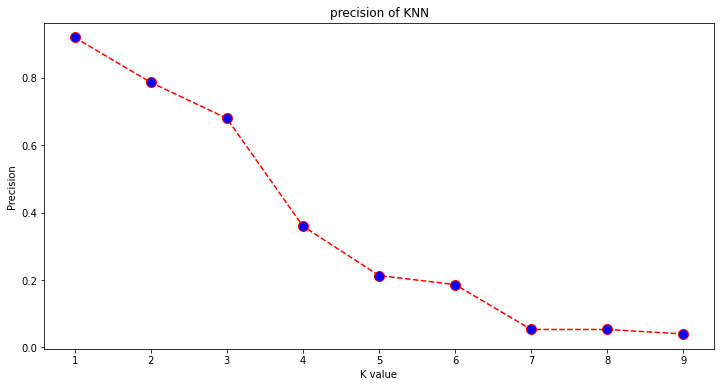

In [22]:
plt.figure(figsize =(12,6))
plt.plot(range(1,10), precision, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('precision of KNN')
plt.xlabel('K value')
plt.ylabel('Precision')

In [93]:

#Euclidean distance between 2 vectors
def eucledian_distance(row1, row2):
    distance=0
    for i in range(len(row1)-1):
        distance+=(row1[i]-row2[i])**2
    return sqrt(distance)

#get neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
            dist = eucledian_distance(test_row, train_row)
            distances.append(train_row, dist)
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

#prediction
def predict(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction